# First overview, LDA


https://mohamedbakrey094.medium.com/all-about-latent-dirichlet-allocation-lda-in-nlp-6cfa7825034e
https://www.analyticsvidhya.com/blog/2023/02/topic-modeling-using-latent-dirichlet-allocation-lda/
https://github.com/KevKibe/Topic-Modelling-using-LDA/blob/main/Topic_Modelling.ipynb

In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import re
import contractions

In [19]:
df=pd.read_csv("./data/2019_2.csv")

print(df.shape)
df.head()

(50269, 10)


,id,date_publish,outlet,headline,lead,body,authors,domain,url,political_leaning
0,52972702,2019-07-01 00:00:00,NPR,Iran Says It Exceeded Enriched Uranium Cap,Iran's foreign minister confirms that his coun...,Iran Says It Exceeded Enriched Uranium Cap\nIr...,NaN,www.npr.org,https://www.npr.org/2019/07/01/737600999/iran-...,LEFT
1,4037078,2019-07-01 00:00:00,The New York Times,Bombing Kills Dozens in Kabul as Taliban Talks...,Attackers set off bombs that wrecked a war mus...,"KABUL, Afghanistan — A complex attack includin...",Thomas Gibbons-Neff;Rod Nordland,www.nytimes.com,https://www.nytimes.com/2019/07/01/world/asia/...,LEFT
2,52904870,2019-07-01 00:00:00,NPR,How Long Will The Current U.S. Economic Expans...,"NPR's Steve Inskeep talks to David Wessel, dir...",How Long Will The Current U.S. Economic Expans...,NaN,www.npr.org,https://www.npr.org/2019/07/01/737535414/how-l...,LEFT
3,18311035,2019-07-01 00:00:00,BBC,Black girls 'perceived as less innocent by US ...,New research from The Georgetown Law Center on...,Video\nNew research from The Georgetown Law Ce...,NaN,www.bbc.com,http://www.bbc.com/news/av/world-us-canada-404...,UNDEFINED
4,4061861,2019-07-01 00:00:00,The New York Times,Pete Buttigieg Raised $24.8 Million in Second ...,Mr. Buttigieg’s total is the latest evidence t...,WASHINGTON — Mayor Pete Buttigieg of South Ben...,Thomas Kaplan,www.nytimes.com,https://www.nytimes.com/2019/07/01/us/politics...,LEFT


### *Headline analysis*

In [20]:
df_left = df[df['political_leaning'] == 'LEFT']
df_center = df[df['political_leaning'] == 'CENTER']
df_right = df[df['political_leaning'] == 'RIGHT']

In [21]:
#lemmatization and removing stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = text.lower()
    text = contractions.fix(text.lower())
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    words = [re.sub(r'[^\w\s]', '', token) for token in words if re.sub(r'[^\w\s]', '', token)]
    return words[:1000]

headline_left = df_left['headline'].apply(preprocess)
body_left = df_left['body'].apply(preprocess)

headline_right = df_right['headline'].apply(preprocess)
body_right = df_right['body'].apply(preprocess)

headline_center = df_center['headline'].apply(preprocess)
body_center = df_center['body'].apply(preprocess)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ALEJANDRO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ALEJANDRO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ALEJANDRO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Create a dictionary from the preprocessed data
dictionary_left = Dictionary(headline_left)
dictionary_right = Dictionary(headline_right)
dictionary_center = Dictionary(headline_center)

# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary_left.filter_extremes(no_below=5, no_above=0.5)
dictionary_right.filter_extremes(no_below=5, no_above=0.5)
dictionary_center.filter_extremes(no_below=5, no_above=0.5)

left_bow_corpus = [dictionary_left.doc2bow(text) for text in headline_left]
right_bow_corpus = [dictionary_right.doc2bow(text) for text in headline_right]
center_bow_corpus = [dictionary_center.doc2bow(text) for text in headline_center]

# Train the LDA model
num_topics = 5
ldamodel = LdaModel(left_bow_corpus, num_topics=num_topics, id2word=dictionary_left, passes=20, alpha='auto', eta='auto')

lda_model_left = LdaModel(corpus=left_bow_corpus,
                     id2word=dictionary_left,
                     num_topics=num_topics,
                     random_state=42,
                     update_every=10,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     eta='auto',
                     per_word_topics=True)


lda_model_right = LdaModel(corpus=right_bow_corpus,
                     id2word=dictionary_right,
                     num_topics=num_topics,
                     random_state=42,
                     update_every=10,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     eta='auto',
                     per_word_topics=True)


lda_model_center = LdaModel(corpus=center_bow_corpus,
                     id2word=dictionary_center,
                     num_topics=num_topics,
                     random_state=42,
                     update_every=10,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     eta='auto',
                     per_word_topics=True)


# Get the topics
topics_left = lda_model_left.show_topics(num_topics=num_topics, num_words=100, log=False, formatted=False)
topics_right = lda_model_right.show_topics(num_topics=num_topics, num_words=100, log=False, formatted=False)
topics_center = lda_model_center.show_topics(num_topics=num_topics, num_words=100, log=False, formatted=False)

lda_model_left.save('./models/lda/lda_model_left_headline.model')
lda_model_right.save('./models/lda/lda_model_right_headline.model')
lda_model_center.save('./models/lda/lda_model_center_headline.model')


In [23]:
print("Topic for Left")
for topic_id, topic in topics_left:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

print("Topic for Right")
for topic_id, topic in topics_right:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

print("Topic for Center")
for topic_id, topic in topics_center:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic for Left
Topic: 0
Words: ['johnson', 'brexit', 'boris', 'say', 'democratic', 'debate', 'fire', '2020', 'uk', 'biden', 'nodeal', 'election', 'show', 'talk', 'could', 'would', 's', 'minister', 'iran', 'climate', 'student', 'joe', 'fear', 'trump', 'million', 'economy', 'candidate', 'plan', 'britain', 'democrat', 'tax', 'view', 'change', 'year', 'voter', 'job', 'race', 'top', 'party', 'move', 'eu', 'look', 'sander', 'set', 'amid', 'risk', 'vote', 'tory', 'like', 'return', 'warren', 'court', 'guardian', 'new', 'india', 'labour', 'go', 'study', 'yous', 'find', 'prime', 'russian', 'leader', 'corbyn', 'deal', 'drop', 'senate', 'video', 'first', 'kid', 'bernie', 'left', 'crisis', 'win', 'elizabeth', 'tell', 'expert', 'british', 'summit', 'campaign', 'warns', 'missile', 'think', 'run', 'harris', 'turn', 'state', 'free', 'urge', 'italy', 'put', 'resigns', 'last', 'join', 'college', 'role', 'refugee', 'poll', 'three', 'government']
Topic: 1
Words: ['trade', 'mass', 'child', 'activist', 'scho

In [24]:
# Evaluate LDA model
'''
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model_left, texts=left_bow_corpus, dictionary=dictionary_left, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence score for the left LDA: {coherence_lda}")

coherence_model_lda = gensim.models.CoherenceModel(model=lda_model_right, texts=right_bow_corpus, dictionary=dictionary_right, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence score for the right LDA: {coherence_lda}")

coherence_model_lda = gensim.models.CoherenceModel(model=lda_model_center, texts=center_bow_corpus, dictionary=dictionary_center, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"Coherence score for the center LDA: {coherence_lda}")
'''

'\ncoherence_model_lda = gensim.models.CoherenceModel(model=lda_model_left, texts=left_bow_corpus, dictionary=dictionary_left, coherence=\'c_v\')\ncoherence_lda = coherence_model_lda.get_coherence()\nprint(f"Coherence score for the left LDA: {coherence_lda}")\n\ncoherence_model_lda = gensim.models.CoherenceModel(model=lda_model_right, texts=right_bow_corpus, dictionary=dictionary_right, coherence=\'c_v\')\ncoherence_lda = coherence_model_lda.get_coherence()\nprint(f"Coherence score for the right LDA: {coherence_lda}")\n\ncoherence_model_lda = gensim.models.CoherenceModel(model=lda_model_center, texts=center_bow_corpus, dictionary=dictionary_center, coherence=\'c_v\')\ncoherence_lda = coherence_model_lda.get_coherence()\nprint(f"Coherence score for the center LDA: {coherence_lda}")\n'

## *Topics for the left*

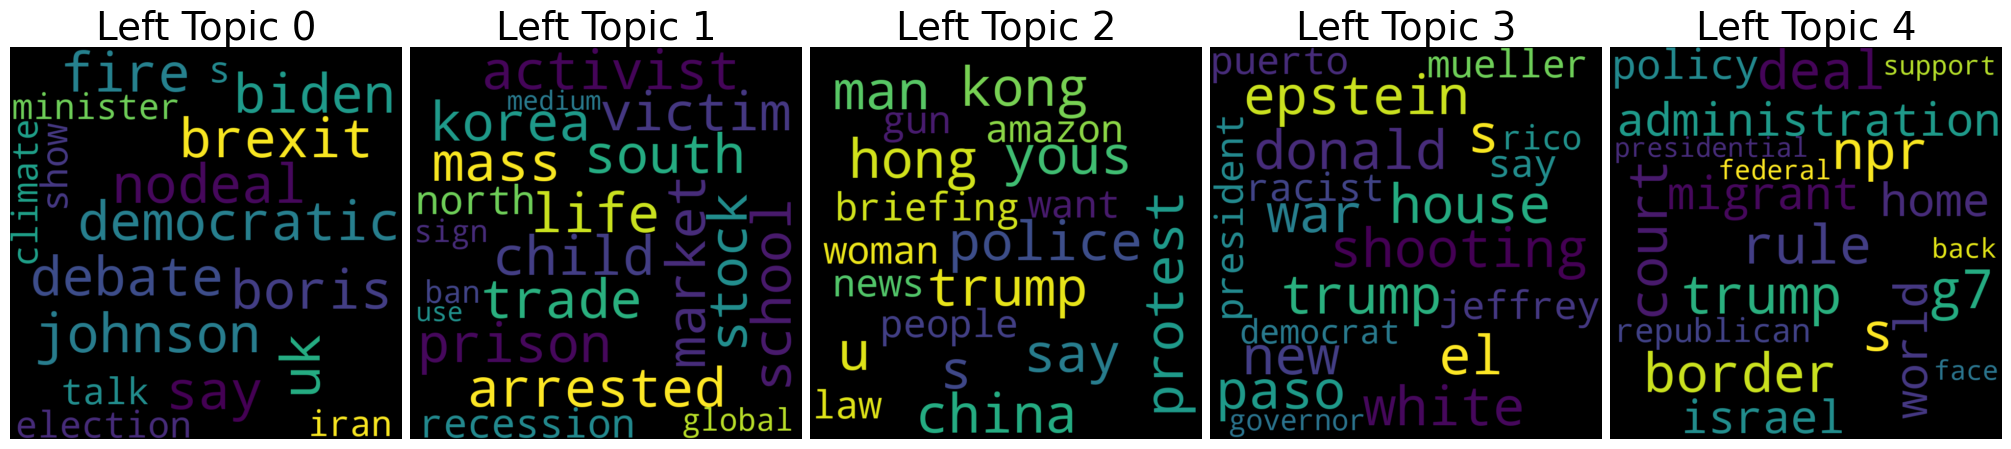

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define the number of topics (adjust as per your LDA model)
num_topics = 5  # Example: 5 topics

# Create a 1x5 grid for the plots
fig, axes = plt.subplots(1, num_topics, figsize=(20, 5), constrained_layout=True)

# Plot a wordcloud for each topic
for topic_id, topic in enumerate(lda_model_left.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    
    # Plot in the corresponding subplot
    ax = axes[topic_id]
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Left Topic {topic_id}", fontsize=28)

# Display the grid of plots
plt.show()


## *Topics for the right*

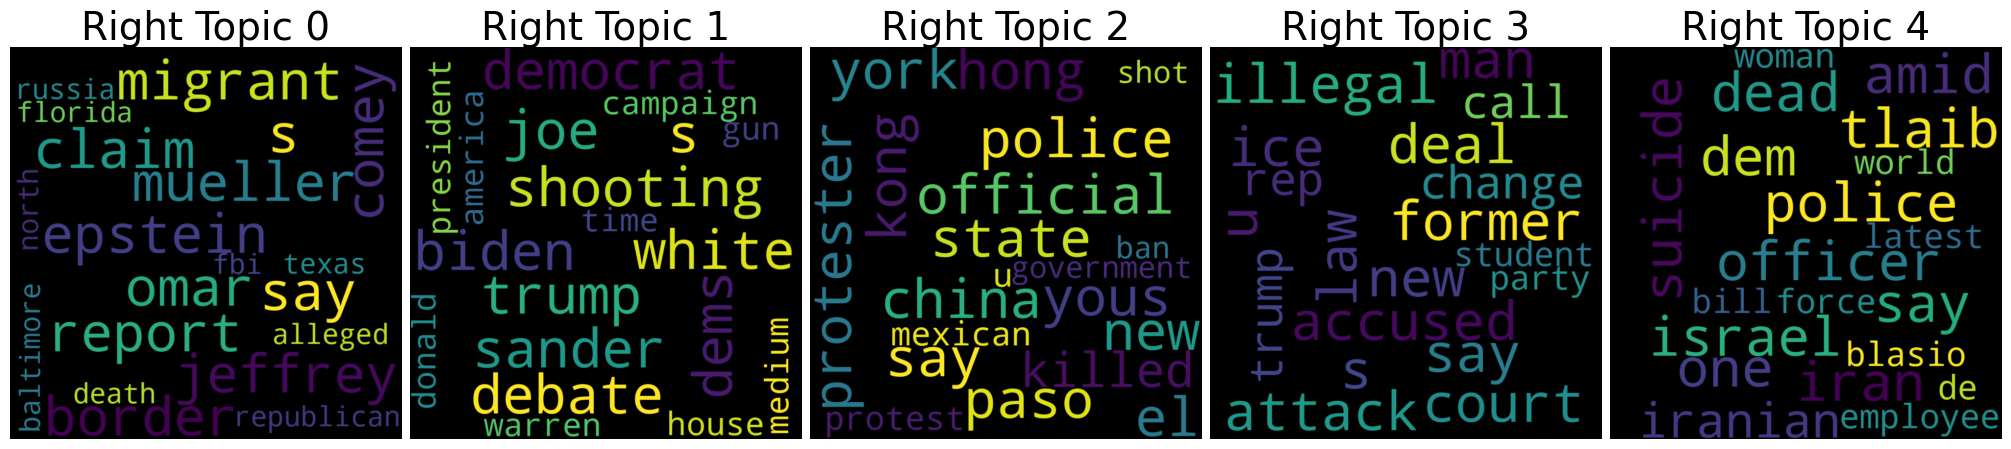

In [26]:
# Plot a wordcloud for each topic
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define the number of topics (adjust as per your LDA model)
num_topics = 5  # Example: 5 topics

# Create a 1x5 grid for the plots
fig, axes = plt.subplots(1, num_topics, figsize=(20, 5), constrained_layout=True)

# Plot a wordcloud for each topic
for topic_id, topic in enumerate(lda_model_right.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    
    # Plot in the corresponding subplot
    ax = axes[topic_id]
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Right Topic {topic_id}", fontsize=28)

# Display the grid of plots
plt.show()


## *Topics for the center*

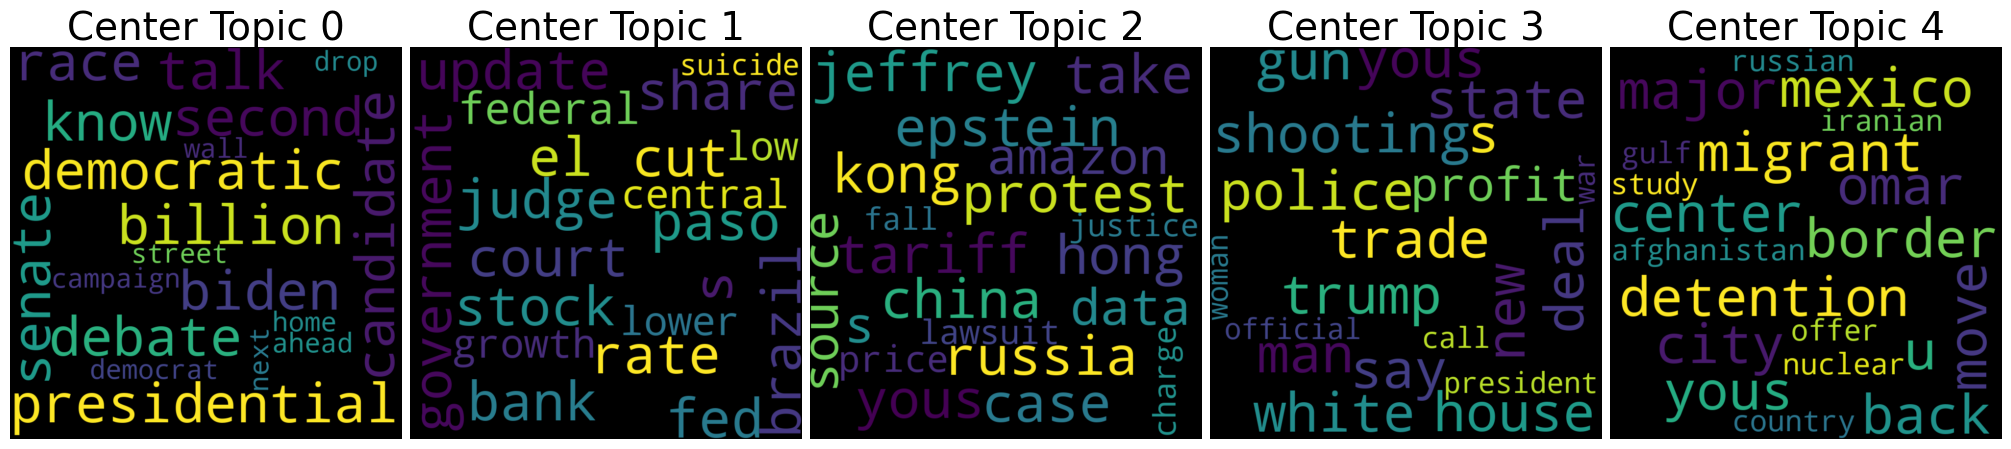

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define the number of topics (adjust as per your LDA model)
num_topics = 5  # Example: 5 topics

# Create a 1x5 grid for the plots
fig, axes = plt.subplots(1, num_topics, figsize=(20, 5), constrained_layout=True)

# Plot a wordcloud for each topic
for topic_id, topic in enumerate(lda_model_center.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    
    # Plot in the corresponding subplot
    ax = axes[topic_id]
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Center Topic {topic_id}", fontsize=28) 

# Display the grid of plots
plt.show()


# **Analysis of body**

In [ ]:
# Create a dictionary from the preprocessed data
dictionary_left = Dictionary(body_left)
dictionary_right = Dictionary(body_right)
dictionary_center = Dictionary(body_center)

# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary_left.filter_extremes(no_below=5, no_above=0.5)
dictionary_right.filter_extremes(no_below=5, no_above=0.5)
dictionary_center.filter_extremes(no_below=5, no_above=0.5)

left_bow_corpus = [dictionary_left.doc2bow(text) for text in body_left]
right_bow_corpus = [dictionary_right.doc2bow(text) for text in body_right]
center_bow_corpus = [dictionary_center.doc2bow(text) for text in body_center]

# Train the LDA model
num_topics = 5

lda_model_left = LdaModel(corpus=left_bow_corpus,
                     id2word=dictionary_left,
                     num_topics=num_topics,
                     random_state=42,
                     update_every=10,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     eta='auto',
                     per_word_topics=True)

lda_model_right = LdaModel(corpus=right_bow_corpus,
                     id2word=dictionary_right,
                     num_topics=num_topics,
                     random_state=42,
                     update_every=10,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     eta='auto',
                     per_word_topics=True)

lda_model_center = LdaModel(corpus=center_bow_corpus,
                     id2word=dictionary_center,
                     num_topics=num_topics,
                     random_state=42,
                     update_every=10,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     eta='auto',
                     per_word_topics=True)

# Get the topics
topics_left = lda_model_left.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)
topics_right = lda_model_right.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)
topics_center = lda_model_center.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)


lda_model_left.save('./models/lda/lda_model_left_body.model')
lda_model_right.save('./models/lda/lda_model_right_body.model')
lda_model_center.save('./models/lda/lda_model_center_body.model')

In [30]:
from gensim.models import LdaModel

# Load the LDA models
lda_model_left = LdaModel.load('./models/lda/lda_model_left_body.model')
lda_model_right = LdaModel.load('./models/lda/lda_model_right_body.model')
lda_model_center = LdaModel.load('./models/lda/lda_model_center_body.model')

# Example: Display the topics for verification
topics_left = lda_model_left.show_topics(num_topics=5, num_words=10)
topics_right = lda_model_right.show_topics(num_topics=5, num_words=10)
topics_center = lda_model_center.show_topics(num_topics=5, num_words=10)

print("Left Topics:", topics_left)
print("Right Topics:", topics_right)
print("Center Topics:", topics_center)

Left Topics: [(0, '0.005*"trump" + 0.004*"new" + 0.004*"say" + 0.004*"state" + 0.003*"u" + 0.003*"time" + 0.003*"president" + 0.003*"country" + 0.003*"s" + 0.003*"two"'), (1, '0.008*"trump" + 0.005*"state" + 0.004*"president" + 0.004*"say" + 0.003*"time" + 0.003*"could" + 0.003*"like" + 0.003*"new" + 0.003*"government" + 0.003*"u"'), (2, '0.005*"new" + 0.005*"say" + 0.004*"government" + 0.004*"time" + 0.003*"trump" + 0.003*"state" + 0.003*"last" + 0.003*"s" + 0.003*"country" + 0.003*"two"'), (3, '0.005*"trump" + 0.004*"state" + 0.004*"president" + 0.004*"new" + 0.003*"time" + 0.003*"police" + 0.003*"city" + 0.003*"could" + 0.003*"government" + 0.003*"say"'), (4, '0.005*"trump" + 0.003*"government" + 0.003*"time" + 0.003*"could" + 0.003*"president" + 0.003*"new" + 0.003*"say" + 0.003*"first" + 0.002*"party" + 0.002*"state"')]
Right Topics: [(0, '0.006*"new" + 0.006*"state" + 0.004*"s" + 0.004*"year" + 0.004*"time" + 0.004*"yous" + 0.003*"police" + 0.003*"country" + 0.003*"american" + 0.

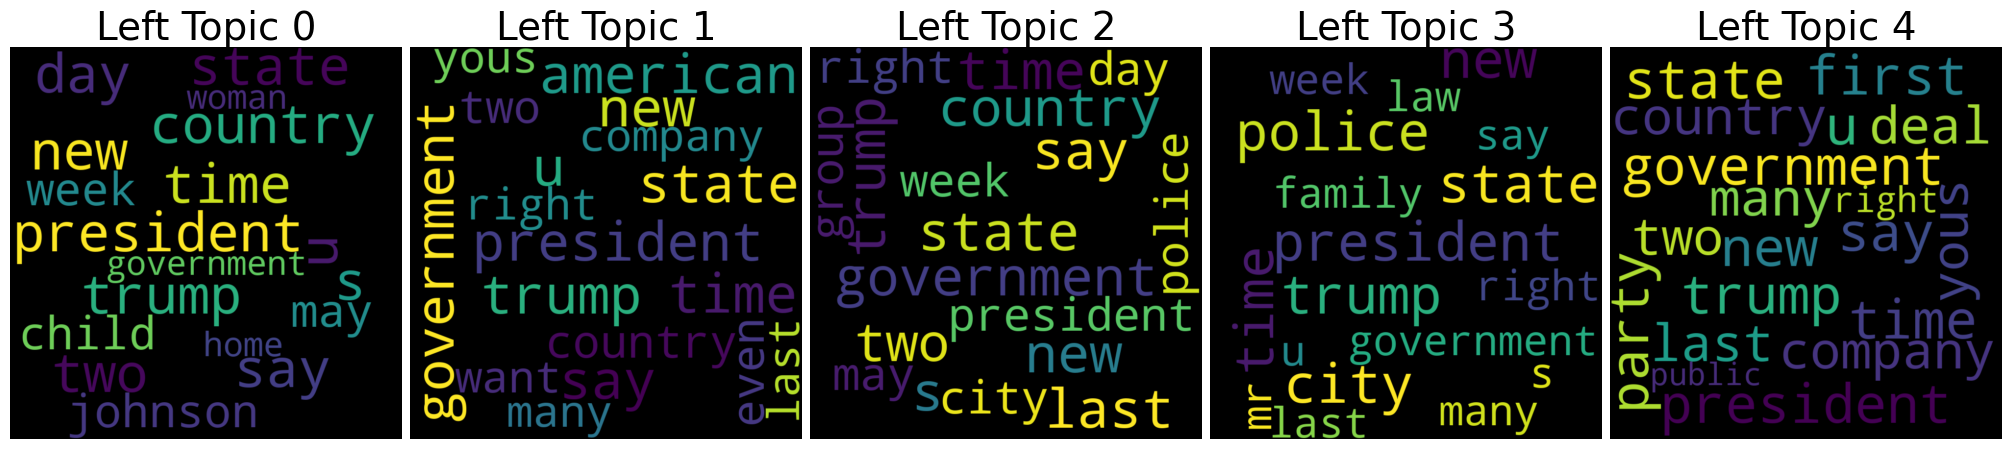

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define the number of topics (adjust as per your LDA model)
num_topics = 5  # Example: 5 topics

# Create a 1x5 grid for the plots
fig, axes = plt.subplots(1, num_topics, figsize=(20, 5), constrained_layout=True)

# Plot a wordcloud for each topic
for topic_id, topic in enumerate(lda_model_left.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    
    # Plot in the corresponding subplot
    ax = axes[topic_id]
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Left Topic {topic_id}", fontsize=28)

# Display the grid of plots
plt.show()


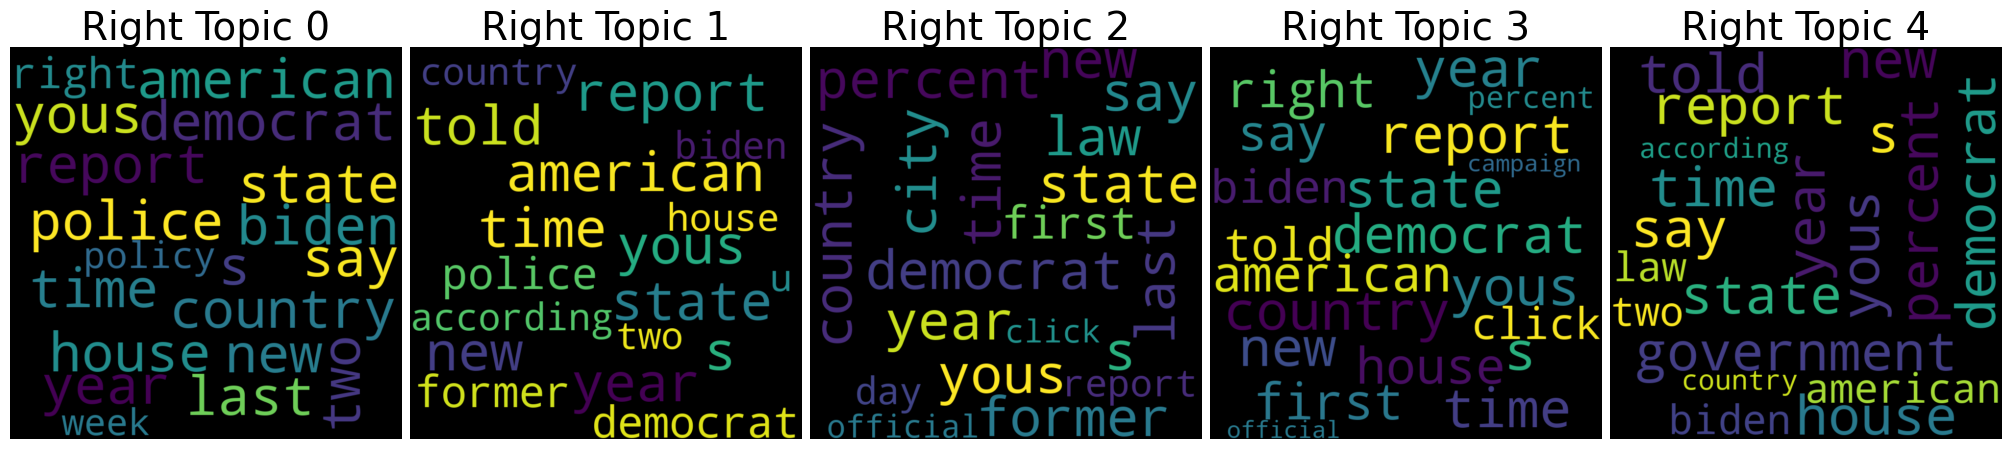

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define the number of topics (adjust as per your LDA model)
num_topics = 5  # Example: 5 topics

# Create a 1x5 grid for the plots
fig, axes = plt.subplots(1, num_topics, figsize=(20, 5), constrained_layout=True)

# Plot a wordcloud for each topic
for topic_id, topic in enumerate(lda_model_right.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    
    # Plot in the corresponding subplot
    ax = axes[topic_id]
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Right Topic {topic_id}", fontsize=28)

# Display the grid of plots
plt.show()


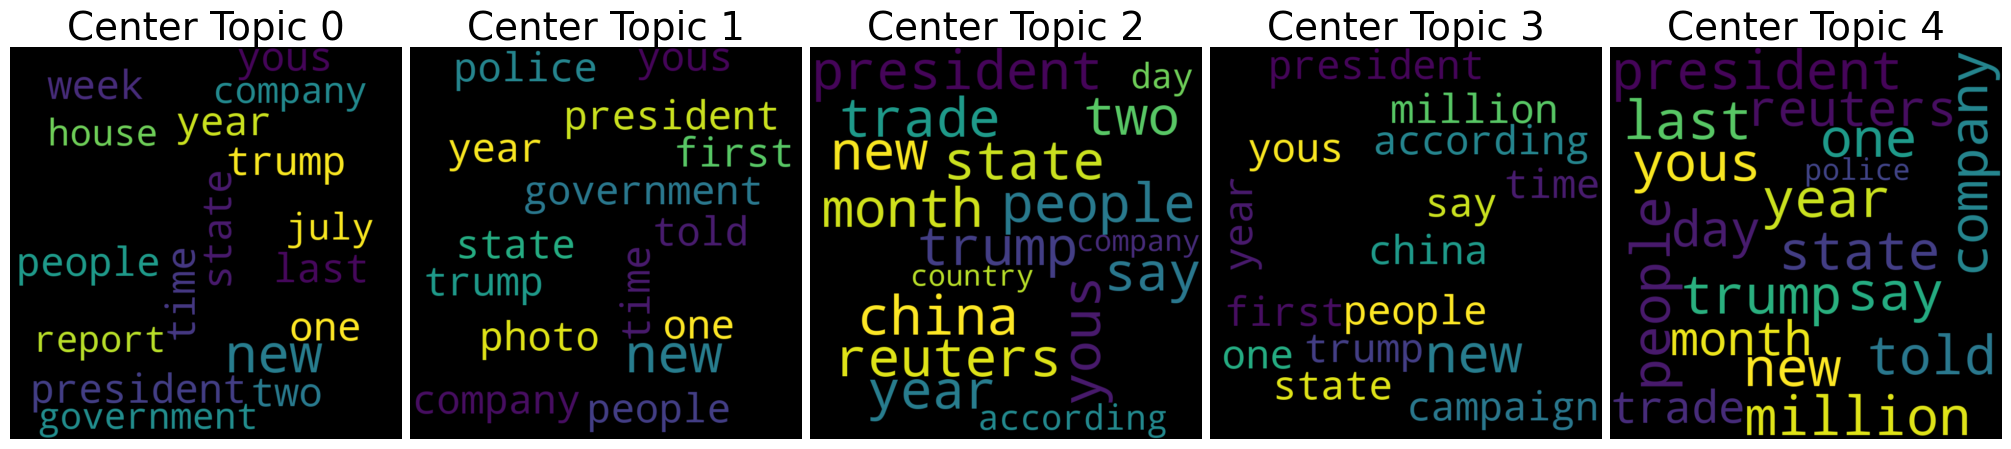

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define the number of topics (adjust as per your LDA model)
num_topics = 5  # Example: 5 topics

# Create a 1x5 grid for the plots
fig, axes = plt.subplots(1, num_topics, figsize=(20, 5), constrained_layout=True)

# Plot a wordcloud for each topic
for topic_id, topic in enumerate(lda_model_center.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    
    # Plot in the corresponding subplot
    ax = axes[topic_id]
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Center Topic {topic_id}", fontsize=28) 

# Display the grid of plots
plt.show()
